# Data Preprocessing 
### It's not just feature engineering

>Data Preprocessing is a technique that is used to convert the raw data into a clean data set.

Why do we need Data Preprocessing?

As humans we are lazy! Mundane tasks are a torture, when that happens even if you getting a super optimized UX Layout it just fails.

Real world data are generally: 
* Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
* Noisy: containing errors or outliers
* Inconsistent: containing discrepancies in codes or names

![](https://imgs.xkcd.com/comics/standards.png)

## Overview of Machine Learning workflow (ideal)

![](https://www.forge.ai/hs-fs/hubfs/Screen%20Shot%202018-05-22%20at%204.49.45%20PM.png?t=1533322978030&width=600&name=Screen%20Shot%202018-05-22%20at%204.49.45%20PM.png)

Source: Tensorflow Extend (TFX) slideshow

To simplify the workflow in a non-technical way, we can consider the following steps that we'd perform:

1. Source: Basically, all your data!
2. Tasks: Problem statement that you define.
3. Understand the data and preparing a sane version of the data to be used for analysis.
4. Data preprocessing and feature engineering.
5. Baseline model.
6. Iterations and comparing metrics.
7. Finalizing the model.

## Data Preprocessing is Feature Engineering or Exploratory Data Analysis or All of them?

Answer to this is maybe, there's a lot of overlap with all the terms mentioned. Any Venn diagram won't solve the problem. Machine Learning is an iterative process and fun part is you'd continue doing all this until you or the decision makers are satisfied.

Take this with a pinch of salt

![](https://pbs.twimg.com/profile_images/835940654509342724/chujJdF__400x400.jpg)

## Scope of this session:

1. Data type: Tabular Data
2. Data Processing for Numeric (Continuous) variables
3. Data Processing for Categorical variables
4. Data Processing for Character variables
5. Data Processing for Time related data

__If time permits, then we can have a small introduction to Regular Expressions and Text Preprocessing pipeline.__

### __Data type: Tabular Data__

Machine Learning was possible coz we could play normalized and de-normalized tables pretty fast. The entire premise of working with tables is scoped around manipulating a `dataframe`. In R, there's the standard `dataframe` format (and also the newly introduced `tibble` format). 

__Pandas__, the data manipulation library helps folks using Python to manipulate their tables.

> Wes McKinney, pandas creator was frustrated with the tools available to complete these basic data tasks at the time—he was not a fan of Excel or R (another popular programming tool).

Back in the day, Python was missing some key features that would make it a good language for data analysis. 

* It was challenging to import CSV files (one of the most common formats for storing datasets). 
* It also didn’t have an intuitive way of dealing with spreadsheet-like datasets with rows and columns, or a simple way to create a new column based on existing columns.

Pandas is super cool, and probably the only data analysis library that almost everyone uses. That's Python Zen in action.

Before we start off with coding, please follow the instructions below:

* Install Miniconda in your systems (__NOTE:__ If Anaconda or Miniconda is already installed please don't install it again):
    * For MacOs and Linux folks: Fire up your terminal and run command --> `curl -L mini.conda.ml | bash`
    * For Windows folks: Please download the `.exe` from [this location](https://conda.io/miniconda.html)
    
* Next step, creating a virtual environment for this session:
    * Run command: `conda` to make sure conda is installed
    * Run command: `conda env -n greyatom python=3.6`
    * Say 'yes' to the installation question.
    
* Once successfully installed, run: `source activate greyatom`
* The next step will be to install the packages using: `pip install pandas matplotlib seaborn jupyter tqdm`


#### Downloading the data:

* We'll be using the Lending Club dataset (2007-2011 & 2012-2013 Data)
* To get the dataset, visit [this website](https://www.lendingclub.com/info/download-data.action)

#### Importing the required libraries

In [82]:
%matplotlib inline
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

pd.set_option('float_format', '{:2f}'.format)
warnings.filterwarnings("ignore", message="binary incompatibility")

Issue with the warnings: [StackOverFlow Issue](https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility) 

#### Setting up the data path

In [2]:
DATA_PATH = "../data/"

#### Importing data files for our dataset

In [15]:
lc1 = pd.read_csv(DATA_PATH+'LoanStats3a.csv', delimiter=',', low_memory=False)

In [6]:
lc2 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3b.csv'), delimiter=',', low_memory=False)

In [55]:
! sed -i '' 1d ../data/LoanStats3d.csv

In [56]:
lc3 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3d.csv'), delimiter=',', low_memory=False)

Let's check whether our imports are exactly how we wanted.

In [16]:
lc1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### What happened here?

These are the situations where we can use the most underrated tool that as Data Scientist we diss: __EXCEL__. 

Many a times the file size that we have is pretty huge and Excel might die a slow death choking your laptop. So make sure that the file you are checking is of a size you'd want to take a risk to open. Or better use the command line.

In [8]:
! cat ../data/LoanStats3a.csv | head -2

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

The first line is something that is a problem, removing that should fix our imports.

In [14]:
! sed -i '' 1d ../data/LoanStats3a.csv

In [17]:
! cat ../data/LoanStats3a.csv | head -2

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [21]:
! sed -i '' 1d ../data/LoanStats3b.csv

In [22]:
! cat ../data/LoanStats3b.csv | head -2

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [23]:
lc1 = pd.read_csv(DATA_PATH+'LoanStats3a.csv', delimiter=',', low_memory=False)
lc2 = pd.read_csv(os.path.join(DATA_PATH, 'LoanStats3b.csv'), delimiter=',', low_memory=False)

In [24]:
lc1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
lc2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4800.0,4800.0,4800.0,36 months,10.99%,157.13,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Let's view the data in a transposed format.

In [27]:
lc1.T

,0,1,2,3,4,5,6,7,8,9,...,42528,42529,42530,42531,42532,42533,42534,42535,42536,42537
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 460296150,Total amount funded in policy code 2: 0
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,3000,2000,6500,3500,1000,2525,6500,5000,NaN,NaN
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,3000,2000,6500,3500,1000,2525,6500,5000,NaN,NaN
funded_amnt_inv,4975,2500,2400,10000,3000,5000,7000,3000,5600,5350,...,0,225,0,225,0,225,0,0,NaN,NaN
term,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,NaN,NaN
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%,7.90%,15.96%,18.64%,21.28%,12.69%,...,9.33%,9.96%,9.64%,10.28%,9.64%,9.33%,8.38%,7.75%,NaN,NaN
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,95.86,64.5,208.66,113.39,32.11,80.69,204.84,156.11,NaN,NaN
grade,B,C,C,C,B,A,C,E,F,B,...,B,B,B,C,B,B,A,A,NaN,NaN
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B3,B5,B4,C1,B4,B3,A5,A3,NaN,NaN


We won't be using all the variables in this dataset, rather a subset of it. Which are these let's figure out. Since, we have two dataframes there's a need to merge these two to create something bigger.

> The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis.

In [28]:
lc1.shape

(42538, 145)

In [29]:
lc2.shape

(188183, 145)

In [30]:
pd.concat([lc1, lc2]).shape

(230721, 145)

> Method chaining, where you call methods on an object one after another.

To know more about this, read [Tom Augsperger's blog](https://tomaugspurger.github.io/method-chaining).

Let's save a copy.

In [31]:
lending_club_concat = pd.concat([lc1, lc2])

In [33]:
lending_club_concat.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Selecting the variables to be used

In [34]:
columns_selected = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', \
                   'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', \
                   'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths']

In [66]:
lending_club_concat = lc3[columns_selected]

In [67]:
lending_club_concat.shape

(421097, 18)

In [68]:
lending_club_concat.T

,0,1,2,3,4,5,6,7,8,9,...,421087,421088,421089,421090,421091,421092,421093,421094,421095,421096
loan_amnt,16000,18500,16000,15000,6000,29900,8800,2500,3600,14650,...,7500,11575,12000,10000,24000,12000,13000,20000,NaN,NaN
term,60 months,60 months,60 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,...,36 months,36 months,36 months,36 months,36 months,60 months,60 months,36 months,NaN,NaN
int_rate,12.88%,12.88%,17.97%,9.80%,7.91%,12.88%,9.80%,17.27%,13.99%,20.50%,...,9.49%,15.59%,11.99%,11.99%,11.99%,19.99%,15.99%,11.99%,NaN,NaN
installment,363.07,419.8,406.04,482.61,187.77,678.49,283.13,89.47,123.03,392.23,...,240.22,404.61,398.52,332.1,797.03,317.86,316.07,664.2,NaN,NaN
grade,C,C,D,B,A,C,B,D,C,E,...,B,D,B,B,B,E,D,B,NaN,NaN
sub_grade,C2,C2,D4,B3,A5,C2,B3,D3,C4,E4,...,B2,D1,B5,B5,B5,E3,D2,B5,NaN,NaN
emp_title,Senior Structural Designer,Supply Chain Coord.,Professional Sales Associate,Electronic Branch Manager,Road driver,Corporate Insurance,Sales Representative/ Agent,Teacher,leadman,Senior Service Specialist,...,Owner,Manager,KYC Business Analyst,Office Assistant,Director of Maintenance,Painter,Radiologist Technologist,Manager Hotel Operations Oasis,NaN,NaN
emp_length,1 year,10+ years,< 1 year,3 years,10+ years,10+ years,10+ years,10+ years,10+ years,2 years,...,8 years,10+ years,< 1 year,8 years,10+ years,1 year,5 years,10+ years,NaN,NaN
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,...,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT,RENT,RENT,NaN,NaN
annual_inc,70000,70000,109000,92000,105000,65000,92000,50000,55000,43160,...,40000,25400,63000,31000,79000,64400,35000,100000,NaN,NaN


### A bit of EDA (to cut down our data even more)

* Target Variable here is definitely the `loan_status`.

In [69]:
lending_club_concat['loan_status'].nunique()

7

In [70]:
set(lending_club_concat['loan_status'])

{'Charged Off',
 'Current',
 'Default',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)',
 nan}

* Since, for our final model we need loans that are completed we'd be picking up `Default`, `Charged Off` and `Fully Paid` to make things a bit simpler.

> DataFrame.query: Query the columns of a frame with a boolean expression.

In [71]:
lending_club_concat.query('loan_status == "Default" or loan_status == "Fully Paid" or \
                        loan_status == "Charged Off"').shape

(302192, 18)

In [72]:
lending_club_concat = lending_club_concat.query('loan_status == "Default" or loan_status == "Fully Paid" or \
                                            loan_status == "Charged Off"')

> Dataframe.groupby: Group series using mapper (dict or key function, apply given function to group, return result as series) or by a series of columns.

In [73]:
lending_club_concat.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off     68293
Default           241
Fully Paid     233658
Name: loan_amnt, dtype: int64

In [74]:
lending_club_concat.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths'],
      dtype='object')

In [75]:
lending_club_concat.groupby(['loan_status', 'grade'])['loan_amnt'].count()

loan_status  grade
Charged Off  A         3612
             B        12426
             C        21014
             D        15623
             E        10792
             F         3865
             G          961
Default      A           12
             B           60
             C           78
             D           42
             E           34
             F           13
             G            2
Fully Paid   A        52171
             B        70182
             C        63740
             D        29384
             E        13908
             F         3488
             G          785
Name: loan_amnt, dtype: int64

Let's focus on C grade for now.

In [76]:
lending_club_concat.query('grade == "C"').shape

(84832, 18)

In [77]:
lending_club_concat = lending_club_concat.query('grade == "C"')

### Data Preprocessing for Numerical (continuous) variables

> dataframe.descibe: Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [83]:
lending_club_concat.describe()

,loan_amnt,installment,annual_inc,dti,inq_last_6mths
count,84832.000000,84832.000000,84832.000000,84831.000000,84832.000000
mean,13933.708683,415.708727,71228.421499,19.511762,0.668474
std,8560.130342,249.484938,66959.084445,8.657987,0.920955
min,1000.000000,33.210000,0.000000,0.000000,0.000000
25%,7200.000000,236.980000,43000.000000,13.020000,0.000000
50%,12000.000000,344.950000,60000.000000,19.070000,0.000000
75%,20000.000000,540.500000,85000.000000,25.740000,1.000000
max,35000.000000,1213.120000,8706582.000000,104.000000,6.000000


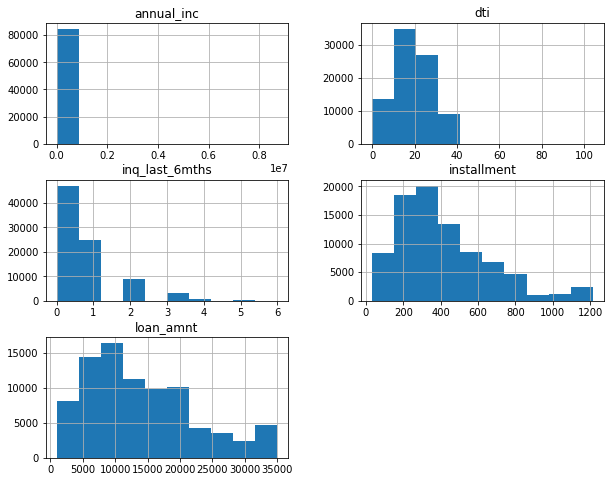

In [81]:
lending_club_concat.hist(figsize=(10,8))
plt.show()

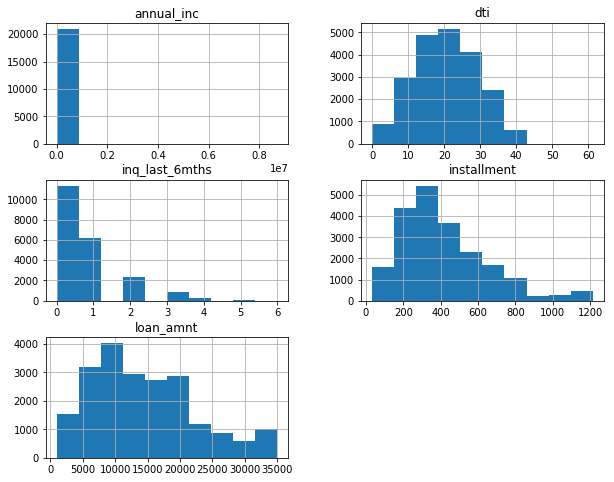

In [87]:
lending_club_concat.query('loan_status == "Charged Off"').groupby('loan_status').hist(figsize=(10,8))
plt.title("By Charged Off")
plt.show()

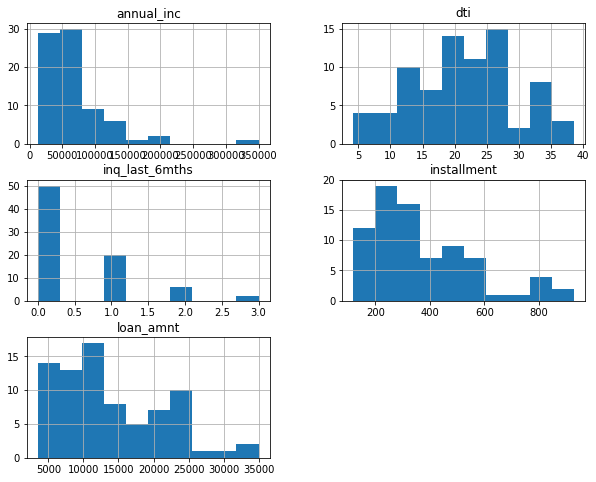

In [88]:
lending_club_concat.query('loan_status == "Default"').groupby('loan_status').hist(figsize=(10,8))
plt.title("By Default")
plt.show()

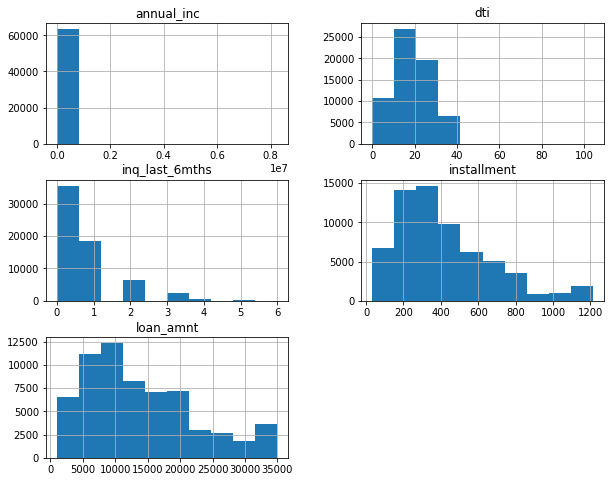

In [89]:
lending_club_concat.query('loan_status == "Fully Paid"').groupby('loan_status').hist(figsize=(10,8))
plt.title("By Fully Paid")
plt.show()

#### Outlier detection

* One of the better methods to detect outliers is to view the box-plot.

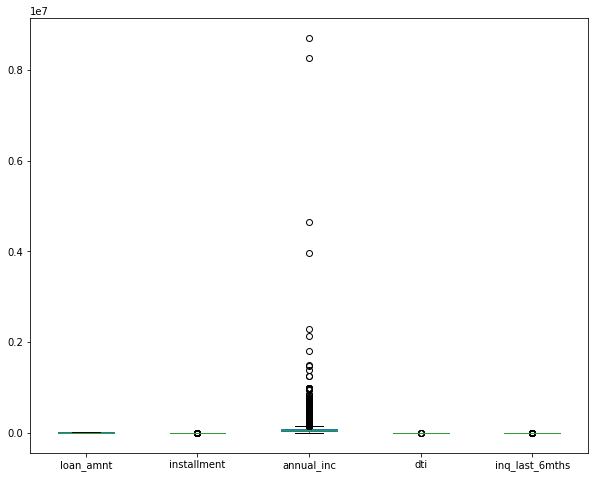

In [91]:
lending_club_concat.plot(kind='box', figsize=(10,8))

Ideal method to identify outliers is to do via calculating __z-score__

> z-score is the number of standard deviations from the mean a data point is.

![](http://static.wixstatic.com/media/f20e2f_4c138256c99945b29c74f69f81dc18b4~mv2.jpg)

In [95]:
from scipy.stats import zscore

standardized = lending_club_concat.groupby('grade').transform(zscore)

In [97]:
outliers = (standardized['installment'] > 3)

In [99]:
lending_club_concat.loc[outliers].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths
119,35000.000000,36 months,13.44%,1186.720000,C,C3,Account executive,< 1 year,MORTGAGE,125000.000000,Source Verified,Dec-2015,Fully Paid,debt_consolidation,MN,24.190000,Jun-2006,0.000000
186,35000.000000,36 months,13.99%,1196.050000,C,C4,RRT,6 years,OWN,75000.000000,Source Verified,Dec-2015,Fully Paid,debt_consolidation,FL,18.190000,Sep-2002,0.000000
424,35000.000000,36 months,13.99%,1196.050000,C,C4,Teacher,10+ years,OWN,121000.000000,Source Verified,Dec-2015,Fully Paid,credit_card,NY,9.230000,Jul-1984,4.000000
1226,35000.000000,36 months,12.88%,1177.270000,C,C2,Deputy,10+ years,RENT,145000.000000,Source Verified,Dec-2015,Fully Paid,credit_card,CA,13.250000,Sep-1997,0.000000
1279,35000.000000,36 months,13.44%,1186.720000,C,C3,Manager,9 years,RENT,86000.000000,Source Verified,Dec-2015,Fully Paid,home_improvement,CA,16.930000,Apr-2004,3.000000


#### Correlation plot

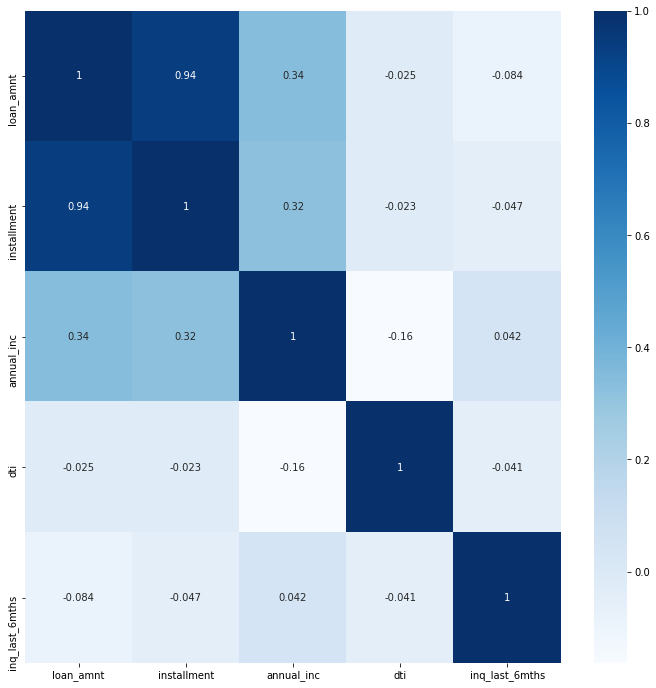

In [104]:
import seaborn as sns
corr = lending_club_concat.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

#### What can we infer from this?

#### Missing Value Imputation

> NaN and None both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate.

In [105]:
pd.Series([1, np.nan, 2, None])

0   1.000000
1        nan
2   2.000000
3        nan
dtype: float64

Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

* `isnull()`: Generate a boolean mask indicating missing values
* `notnull()`: Opposite of isnull()
* `dropna()`: Return a filtered version of the data
* `fillna()`: Return a copy of the data with missing values filled or imputed

The scikit-learn library provides the Imputer() pre-processing class that can be used to replace missing values.
It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The Imputer class operates directly on the NumPy array instead of the DataFrame.
The example below uses the Imputer class to replace missing values with the mean of each column then prints the number of NaN values in the transformed matrix.

In [108]:
from sklearn.preprocessing import Imputer

### Binarization

Types:

1. Rule based binarization
2. Quantile based binarization

### Scaling Data

Two important technqiues:

1. Standardization (or Z-Score normalization)
2. Min-Max Scaling

#### Standardization (or z-score normalization)

> The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution. 

$$z = \frac{x\;-\mu}{\sigma}$$

Some examples of algorithms where feature scaling matters are:

* k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
* k-means (see k-nearest neighbors)
* logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
* linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.


#### Min-Max Scaling

> An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1.


$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Data Processing for Categorical variables

Approaches:

1. Replacement using pandas `replace()`
2. Using `pd.get_dummies()`
3. Using sklearn preprocessing
    * One-Hot Encoding
    * Label Encoding

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame([['A','B','C','D','E','F','G','I','K','H'],
                   ['A','E','H','F','G','I','K','','',''],
                   ['A','C','I','F','H','G','','','','']], 
                  columns=['A1', 'A2', 'A3','A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'])

# pd.DataFrame(columns=df.columns, data=LabelEncoder().fit_transform(df.values.flatten()).reshape(df.shape))

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,2,3,4,5,6,7,9,10,8
1,1,5,8,6,7,9,10,0,0,0
2,1,3,9,6,8,7,0,0,0,0


### Data Processing for Character variables

### Data Processing for Time related data

### Data Leakage

> The goal of machine learning is to develop a model that makes accurate predictions on new data, unseen during training.

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

The effect is overfitting your training data and having an overly optimistic evaluation of you models performance on unseen data.

__Example 1:__

The data rescaling process that you performed had knowledge of the full distribution of data in the training dataset when calculating the scaling factors (like min and max or mean and standard deviation). This knowledge was stamped into the rescaled values and exploited by all algorithms in your cross validation test harness.

__Example 2:__

Unknowingly you put your target variable as a feature in the 


Solution to this is to make sure:

* Demarkation between train, test and feature estimation data (Example is using Bin Counting to estimate the _conditional probability_ of target under that categorical variable).
* Usage of `Pipeline` while creating your Machine Learning models.


### What are Pipelines? 

Transformer in scikit-learn - some class that have fit and transform method, or fit_transform method.

Predictor - some class that has fit and predict methods, or fit_predict method.

Pipeline is just an abstract notion, it's not some existing ml algorithm. Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

#### Usage without pipeline:

```python
 vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()

vX = vect.fit_transform(Xtrain)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)

# Now evaluate all steps on test set
vX = vect.fit_transform(Xtest)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)
```

#### Usage with pipeline:

```python
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
predicted = pipeline.fit(Xtrain).predict(Xtrain)
# Now evaluate all steps on test set
predicted = pipeline.predict(Xtest)
```